In [2]:
import warnings

import numpy as np
import pandas as pd

warnings.filterwarnings("ignore")

# Matplotlib forms basis for visualization in Python
import matplotlib.pyplot as plt
# We will use the Seaborn library
import seaborn as sns

sns.set()

# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

In [3]:
df = pd.read_csv("telecom_churn.csv")

array([[<AxesSubplot:title={'center':'Total day minutes'}>,
        <AxesSubplot:title={'center':'Total intl calls'}>]], dtype=object)

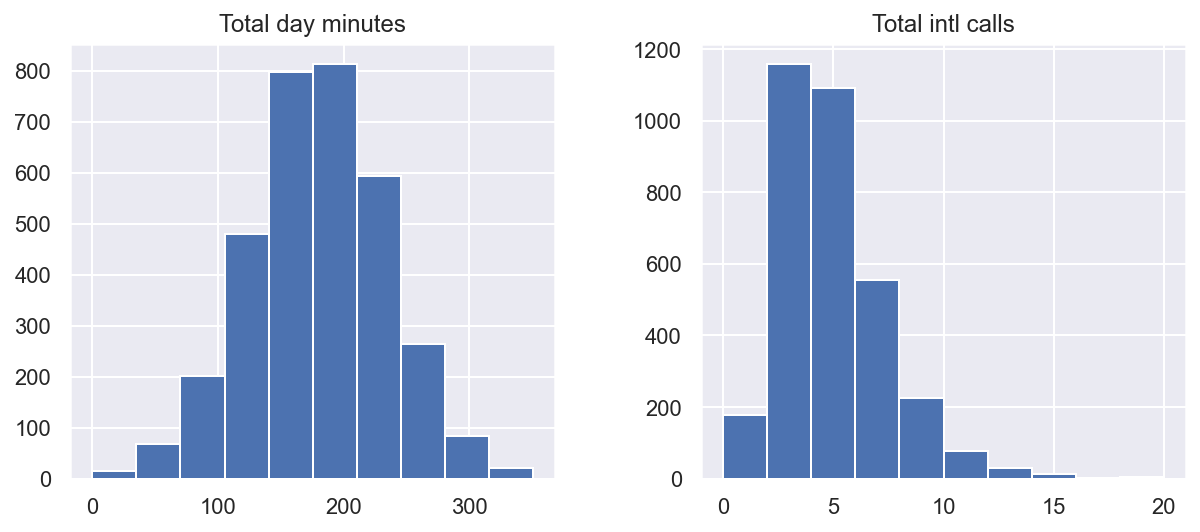

In [4]:
features = ["Total day minutes", "Total intl calls"]
df[features].hist(figsize=(10, 4))

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

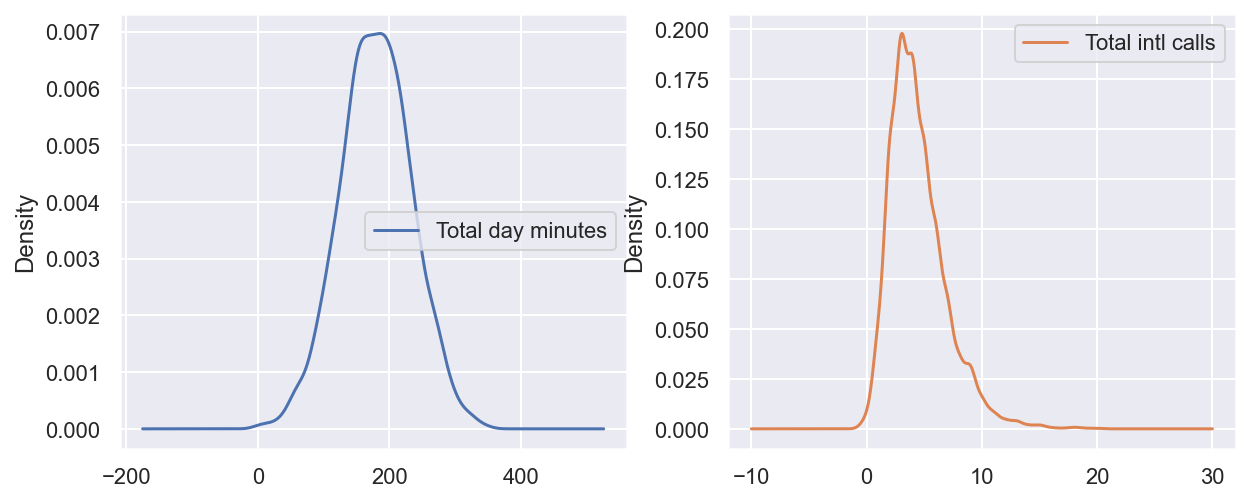

In [5]:
df[features].plot(
    kind="density", subplots=True, layout=(1, 2), sharex=False, figsize=(10, 4)
)

<AxesSubplot:xlabel='Total intl calls'>

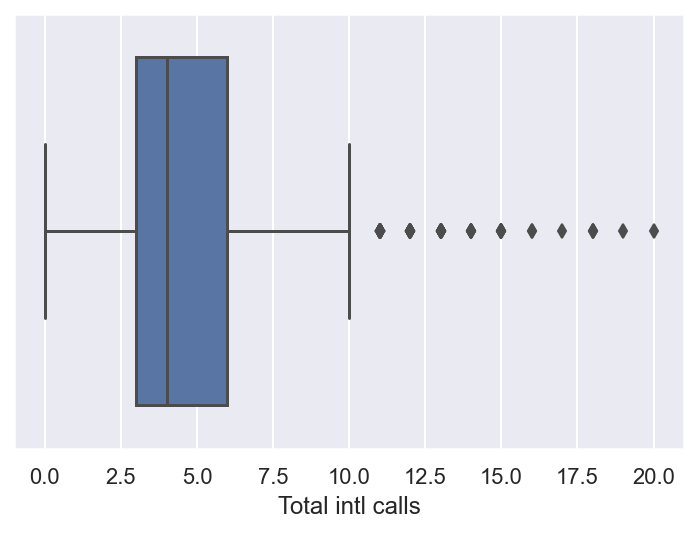

In [6]:
sns.boxplot(x="Total intl calls", data=df)

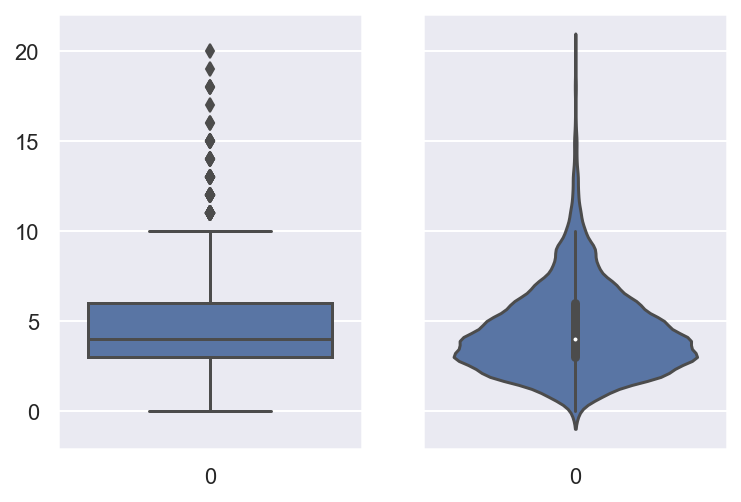

In [7]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=df["Total intl calls"], ax=axes[0])
sns.violinplot(data=df["Total intl calls"], ax=axes[1]);

In [8]:
df[features].describe()

,Total day minutes,Total intl calls
count,3333.000000,3333.000000
mean,179.775098,4.479448
std,54.467389,2.461214
min,0.000000,0.000000
25%,143.700000,3.000000
50%,179.400000,4.000000
75%,216.400000,6.000000
max,350.800000,20.000000


<AxesSubplot:xlabel='Churn', ylabel='count'>

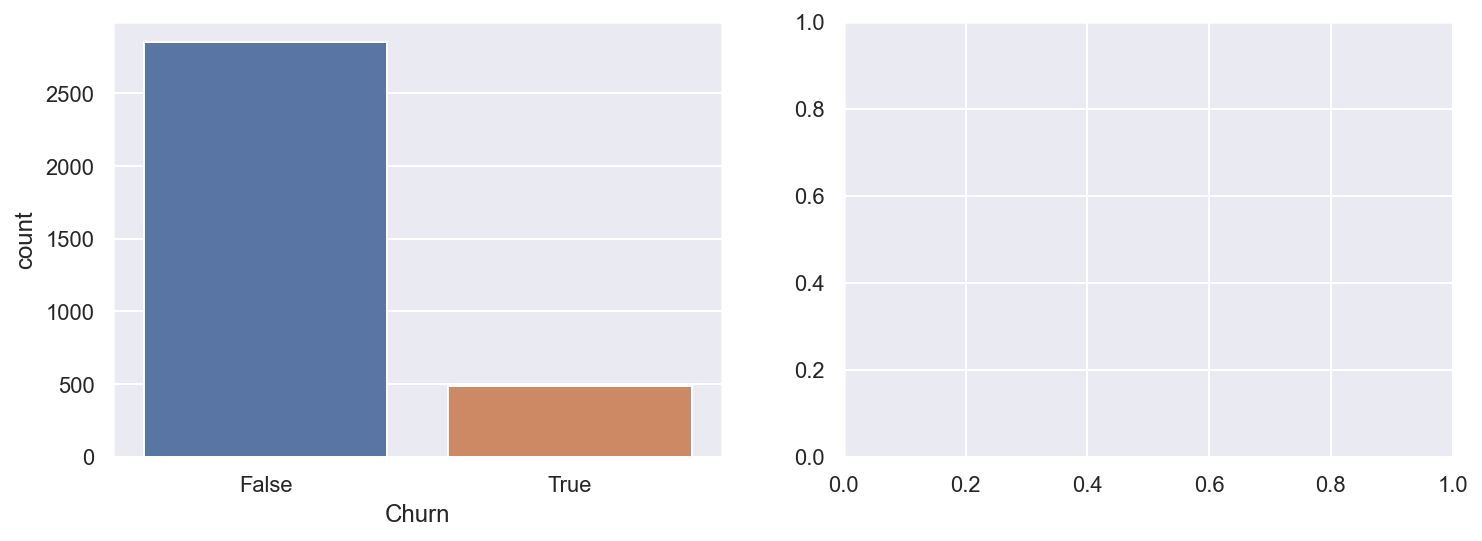

In [9]:
df["Churn"].value_counts()
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x="Churn", data=df, ax=axes[0])

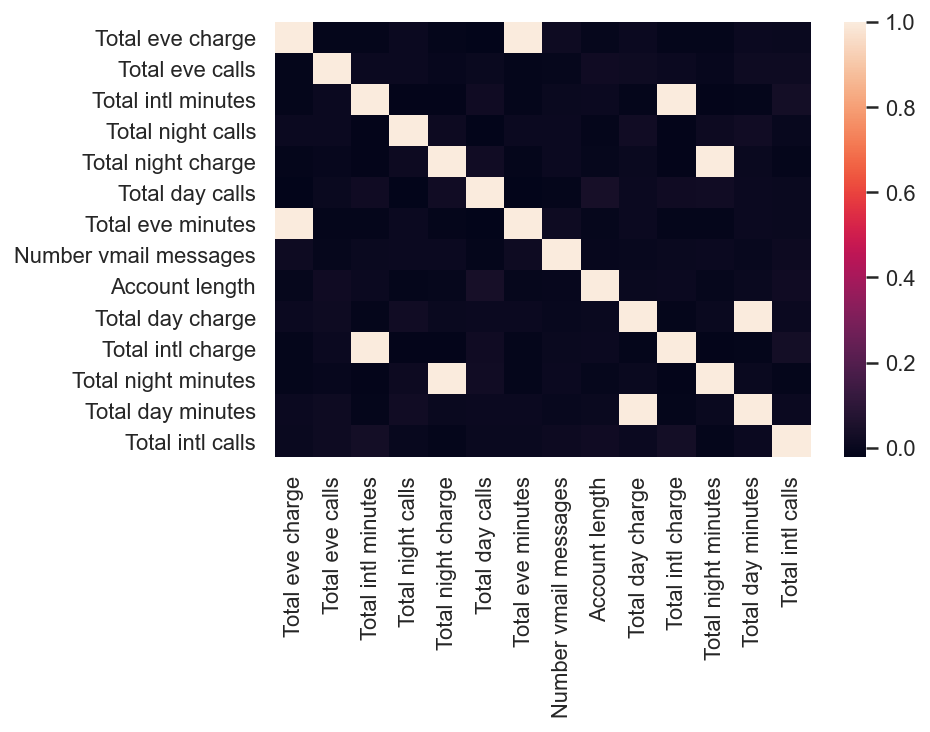

In [10]:
numerical = list(
    set(df.columns)
    - {
        "State",
        "International plan",
        "Voice mail plan",
        "Area code",
        "Churn",
        "Customer service calls",
    }
)

# Calculate and plot
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix);

In [11]:
numerical = list(
    set(numerical)
    - {
        "Total day charge",
        "Total eve charge",
        "Total night charge",
        "Total intl charge",
    }
)

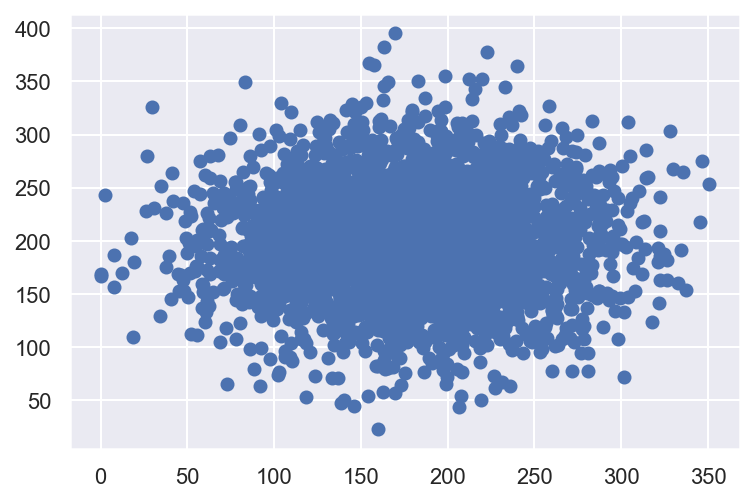

In [12]:
plt.scatter(df["Total day minutes"], df["Total night minutes"])

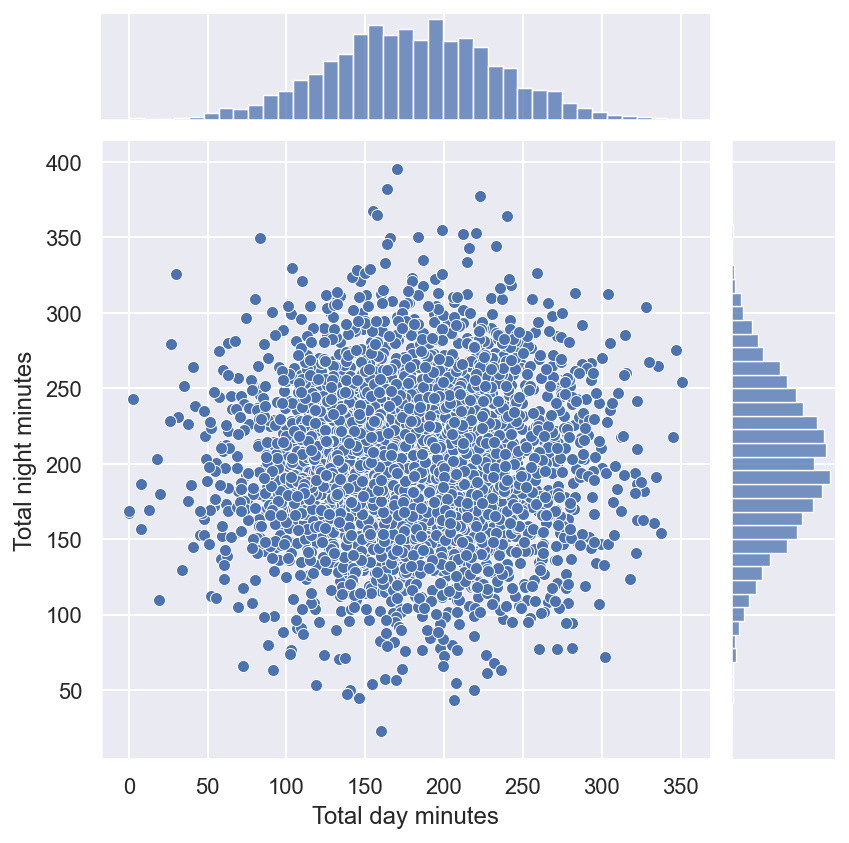

In [13]:
sns.jointplot(x="Total day minutes", y="Total night minutes", data=df, kind="scatter");

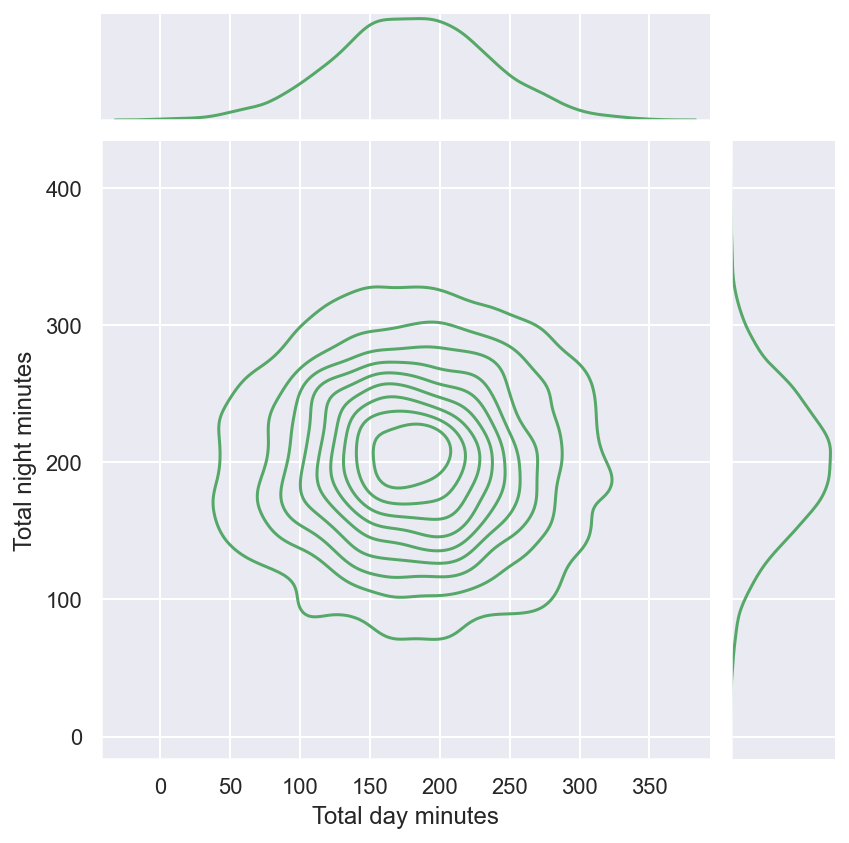

In [14]:
sns.jointplot(
    "Total day minutes", "Total night minutes", data=df, kind="kde", color="g"
);

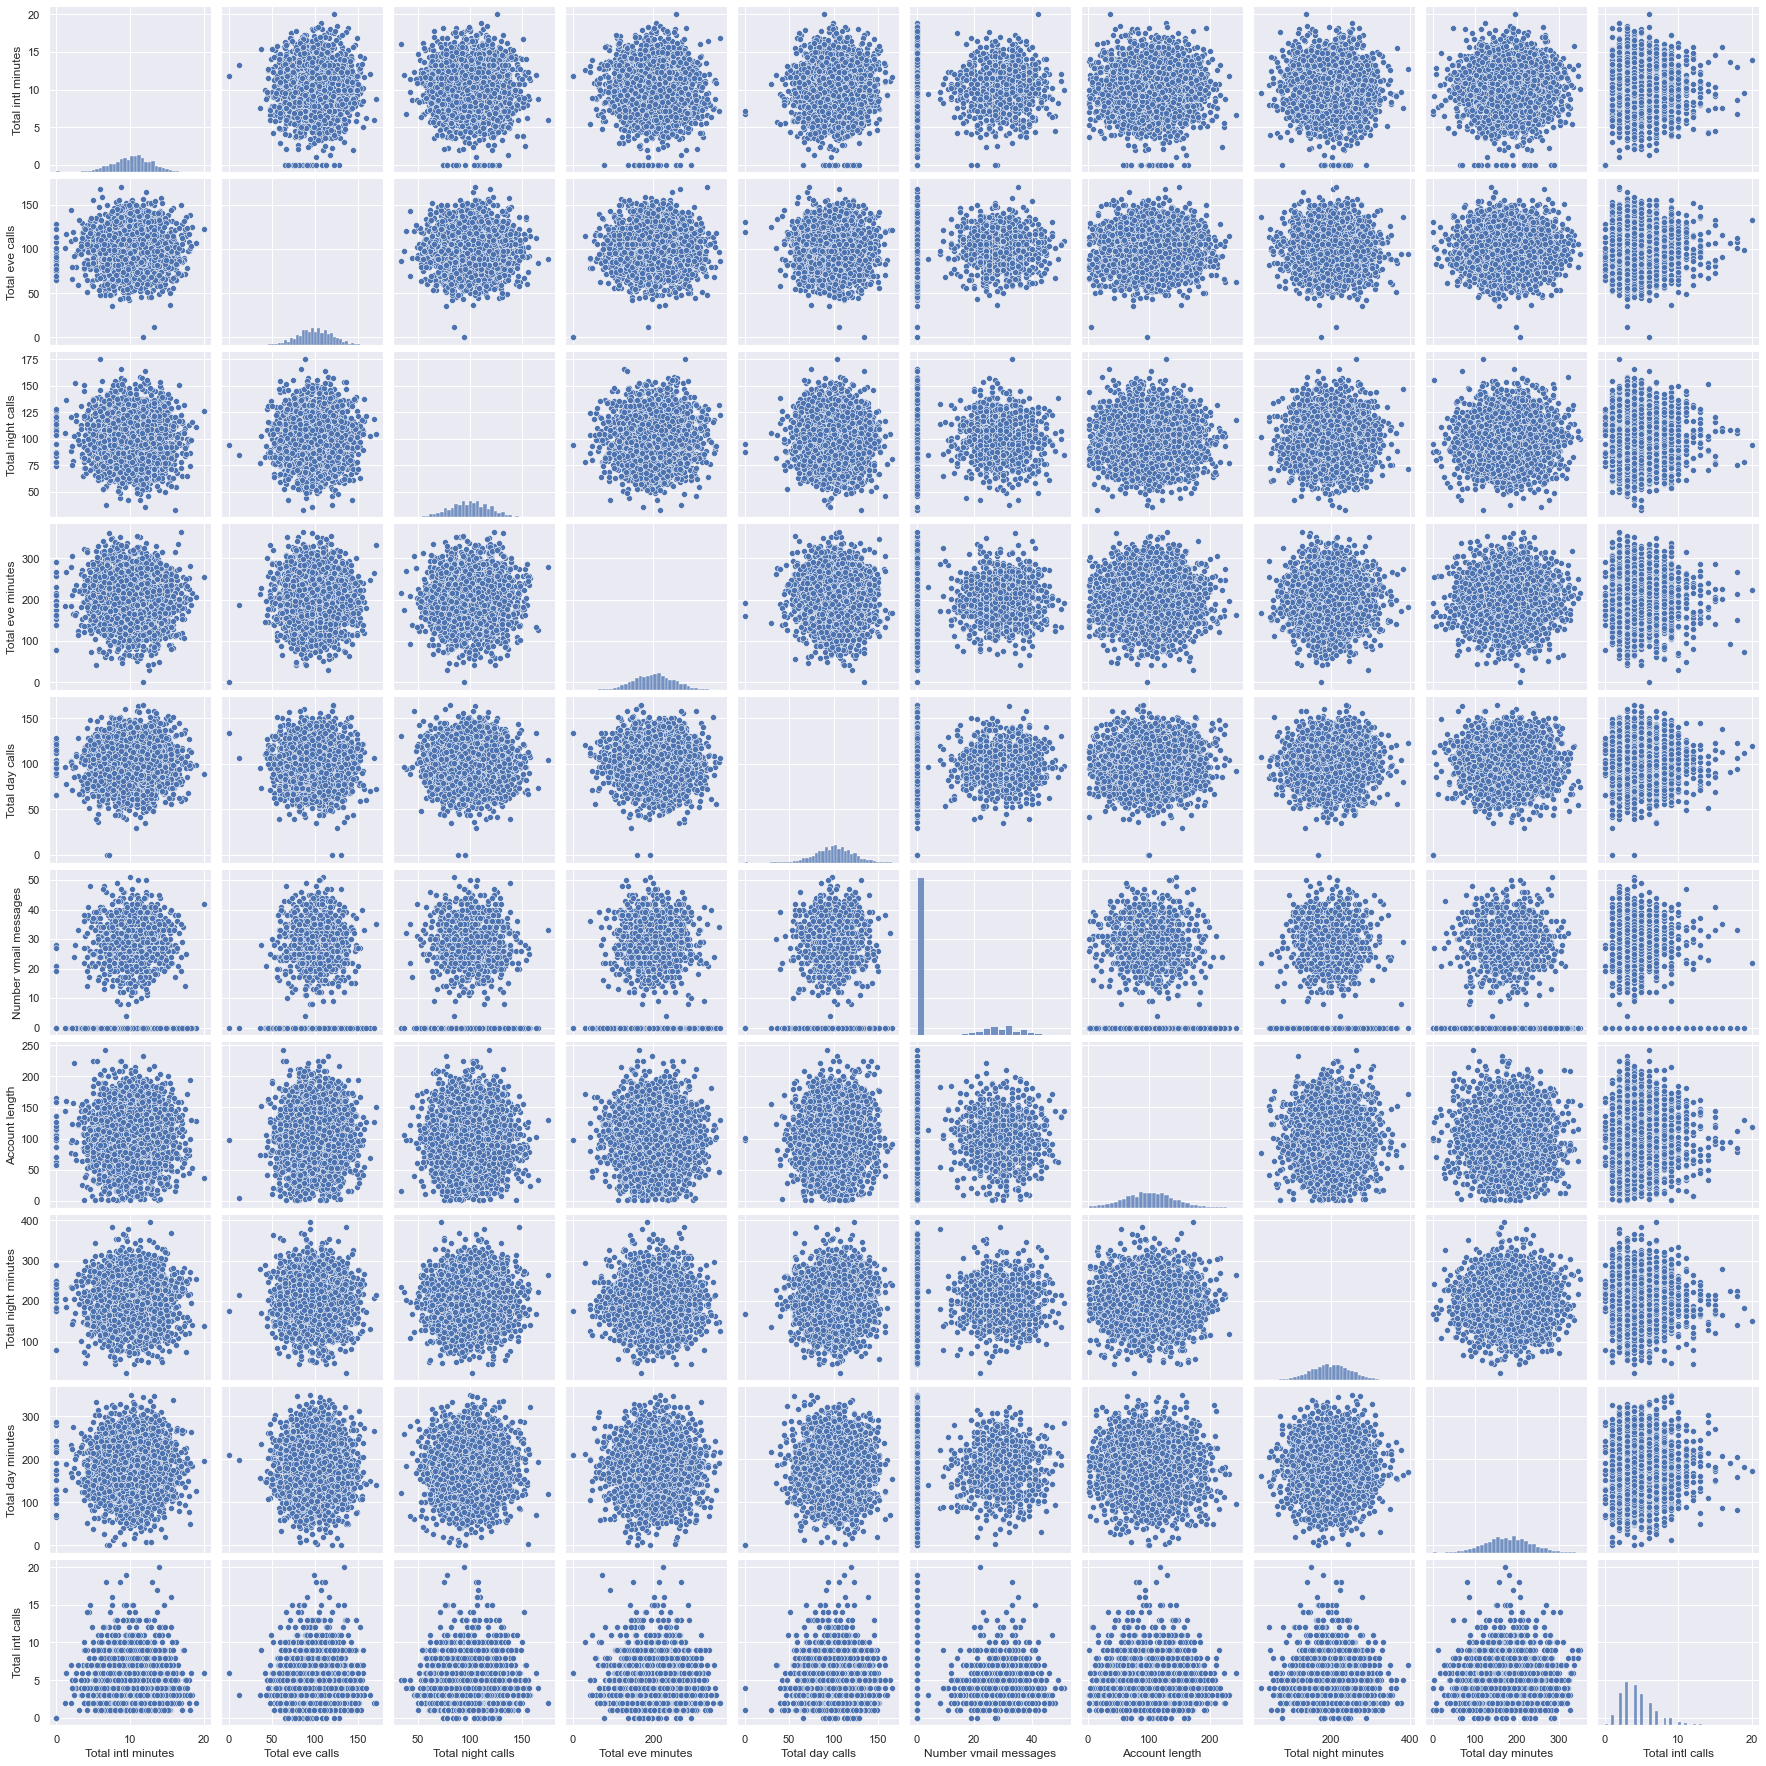

In [15]:
%config InlineBackend.figure_format = 'png'
sns.pairplot(df[numerical]);

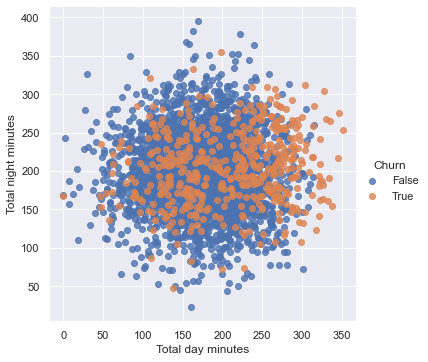

In [16]:
sns.lmplot(
    "Total day minutes", "Total night minutes", data=df, hue="Churn", fit_reg=False
);

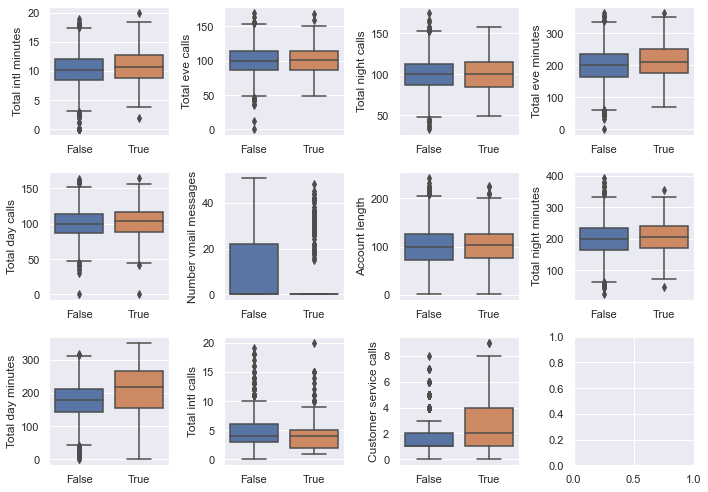

In [17]:
numerical.append("Customer service calls")

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7))
for idx, feat in enumerate(numerical):
    ax = axes[int(idx / 4), idx % 4]
    sns.boxplot(x="Churn", y=feat, data=df, ax=ax)
    ax.set_xlabel("")
    ax.set_ylabel(feat)
fig.tight_layout()

<AxesSubplot:xlabel='Customer service calls', ylabel='count'>

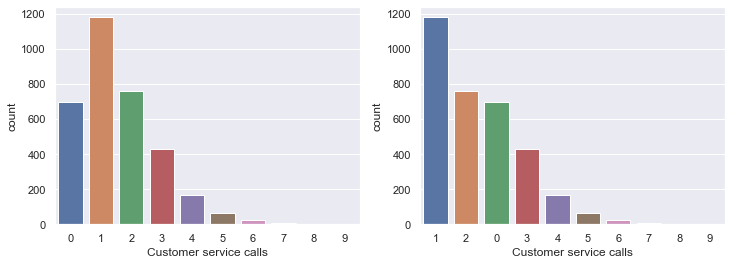

In [18]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x="Customer service calls", data=df, ax=axes[0])
sns.countplot(x="Customer service calls", data=df, ax=axes[1], order = df["Customer service calls"].value_counts().index)

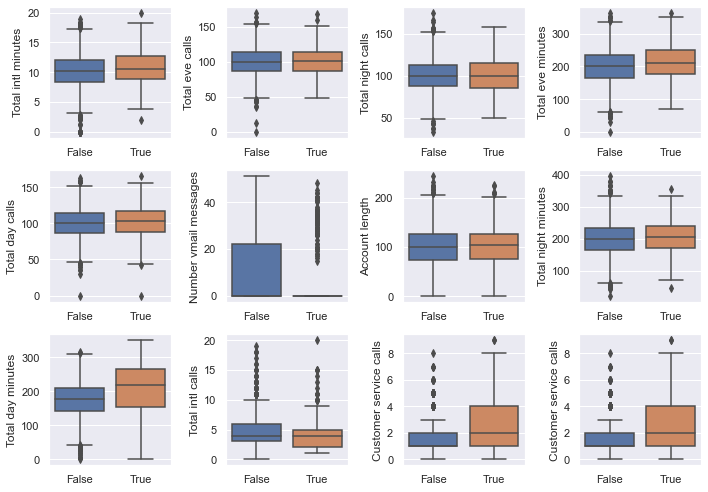

In [19]:
numerical.append("Customer service calls")

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7))
for idx, feat in enumerate(numerical):
    ax = axes[int(idx / 4), idx % 4]
    sns.boxplot(x="Churn", y=feat, data=df, ax=ax)
    ax.set_xlabel("")
    ax.set_ylabel(feat)
fig.tight_layout();

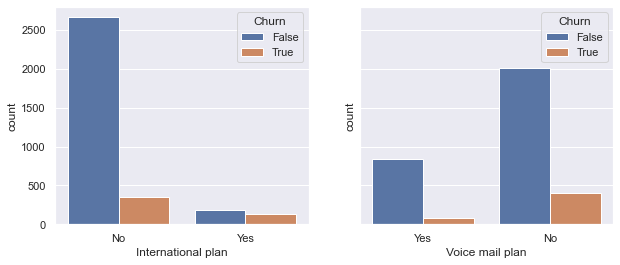

In [20]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.countplot(x="International plan", hue="Churn", data=df, ax=axes[0])
sns.countplot(x="Voice mail plan", hue="Churn", data=df, ax=axes[1]);

In [23]:
pd.crosstab(df["State"], df["Churn"]).T

State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
Churn,,,,,,,,,,,,,,,,,,,,,
False,49,72,44,60,25,57,62,49,52,55,...,52,48,54,62,72,65,52,71,96,68
True,3,8,11,4,9,9,12,5,9,8,...,8,5,18,10,5,8,14,7,10,9


In [24]:
df.groupby(["State"])["Churn"].agg([np.mean]).sort_values(by="mean", ascending=False).T 

State,NJ,CA,TX,MD,SC,MI,MS,NV,WA,ME,...,RI,WI,IL,NE,LA,IA,VA,AZ,AK,HI
mean,0.264706,0.264706,0.25,0.242857,0.233333,0.219178,0.215385,0.212121,0.212121,0.209677,...,0.092308,0.089744,0.086207,0.081967,0.078431,0.068182,0.064935,0.0625,0.057692,0.056604


In [25]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [26]:
X = df.drop(["Churn", "State"], axis=1)
X["International plan"] = X["International plan"].map({"Yes": 1, "No": 0})
X["Voice mail plan"] = X["Voice mail plan"].map({"Yes": 1, "No": 0})

In [27]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(X_scaled)

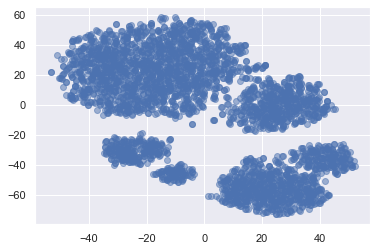

In [31]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], alpha=0.5);

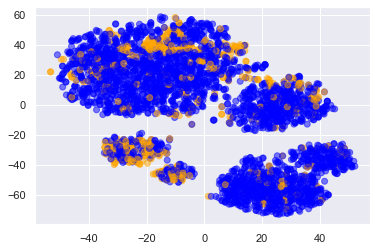

In [29]:
plt.scatter(
    tsne_repr[:, 0],
    tsne_repr[:, 1],
    c=df["Churn"].map({False: "blue", True: "orange"}),
    alpha=0.5,
);

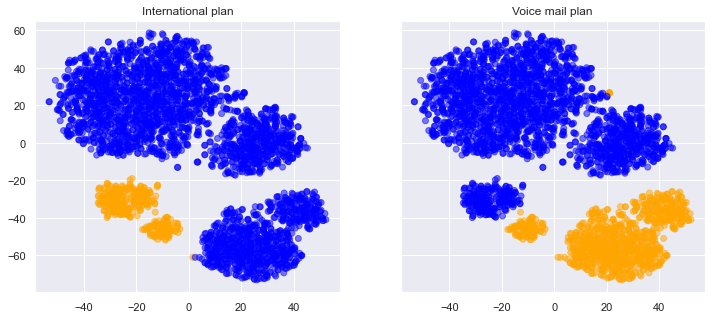

In [30]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 5))

for i, name in enumerate(["International plan", "Voice mail plan"]):
    axes[i].scatter(
        tsne_repr[:, 0],
        tsne_repr[:, 1],
        c=df[name].map({"Yes": "orange", "No": "blue"}),
        alpha=0.5,
    )
    axes[i].set_title(name);